In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import random
import re
from scipy.cluster.hierarchy import ward, dendrogram
import numpy as np

In [2]:
#pip install openpyxl
#pip install wordcloud

In [27]:
negativeTweets = pd.read_excel('./data/Tweets_Negative_CC.xlsx',sheet_name="Negative_Tweets",engine='openpyxl')

In [28]:
tweetList = []
for i in range(len(negativeTweets)):
    tweetList += [negativeTweets.iloc[i][0]]
tweetList

['RT @glbl301 : These are only a few instances, but there are many, many more. The more I looked up, the more cases there seemed to be of #Nestlé and other beverage giants like #CocaCola and #Pepsi depriving water poor communities around the world of access to clean drinking water.',
 "Mike Luckovich at the Atlanta Journal-Constitution captures the Park's proposal for changes-what Bill Stephens, the governing board's CEO, called a\xa0“reasonable, common-sense middle ground.” https://t.co/MinP6hKf2P\n#smac #stonemountain #removetheflag #cocacola #whosehertage https://t.co/CcYtRJ7djU",
 'RT @PatrioticSocia1 : It’s okay to be white.\n\nThere is nothing wrong with it.\n\n#cocacola\n#BoycottCocacola',
 'RT @PatrioticSocia1 : It’s okay to be white.\n\nThere is nothing wrong with it.\n\n#cocacola\n#BoycottCocacola',
 'RT @PatrioticSocia1 : It’s okay to be white.\n\nThere is nothing wrong with it.\n\n#cocacola\n#BoycottCocacola',
 'RT @PatrioticSocia1 : It’s okay to be white.\n\nThere is nothi

In [29]:
vectorizer = TfidfVectorizer(stop_words={'english'},max_df=0.8)
X = vectorizer.fit_transform(tweetList)
X

<507x1004 sparse matrix of type '<class 'numpy.float64'>'
	with 15315 stored elements in Compressed Sparse Row format>

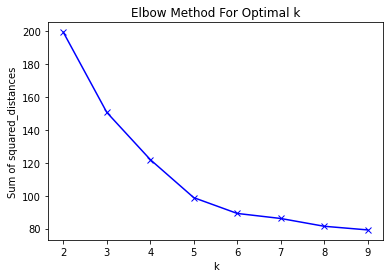

In [30]:
sumofsquareddistance = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   sumofsquareddistance.append(km.inertia_)
plt.plot(K, sumofsquareddistance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
random.seed(22)
idealK = 6
model = KMeans(n_clusters=idealK, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
tweetClusters=pd.DataFrame(list(zip(tweetList,labels)),columns=['tweet','cluster'])
print(tweetClusters.sort_values(by=['cluster']))
tweetClusters.groupby('cluster').count()

                                                 tweet  cluster
41   RT @fordmb1 : The right amount of #CocaCola is...        0
50   The right amount of #CocaCola is zero. Not Cok...        0
34   RT @fordmb1 : The right amount of #CocaCola is...        0
47   RT @fordmb1 : The right amount of #CocaCola is...        0
46   RT @fordmb1 : The right amount of #CocaCola is...        0
..                                                 ...      ...
505  Yes ! ColaDay .com now available!\nhttps://t.c...        5
275  If you remain Woke, you will become Broke. #Co...        5
278  LOL #BrokaCola Quincey got woke and went broke...        5
225  RT @londonbnp : Two reasons to boycott Coca-Co...        5
506  RT @schoene : we would like to see deliberate ...        5

[507 rows x 2 columns]


tweet
cluster       
0           11
1          276
2           61
3           30
4           36
5           93

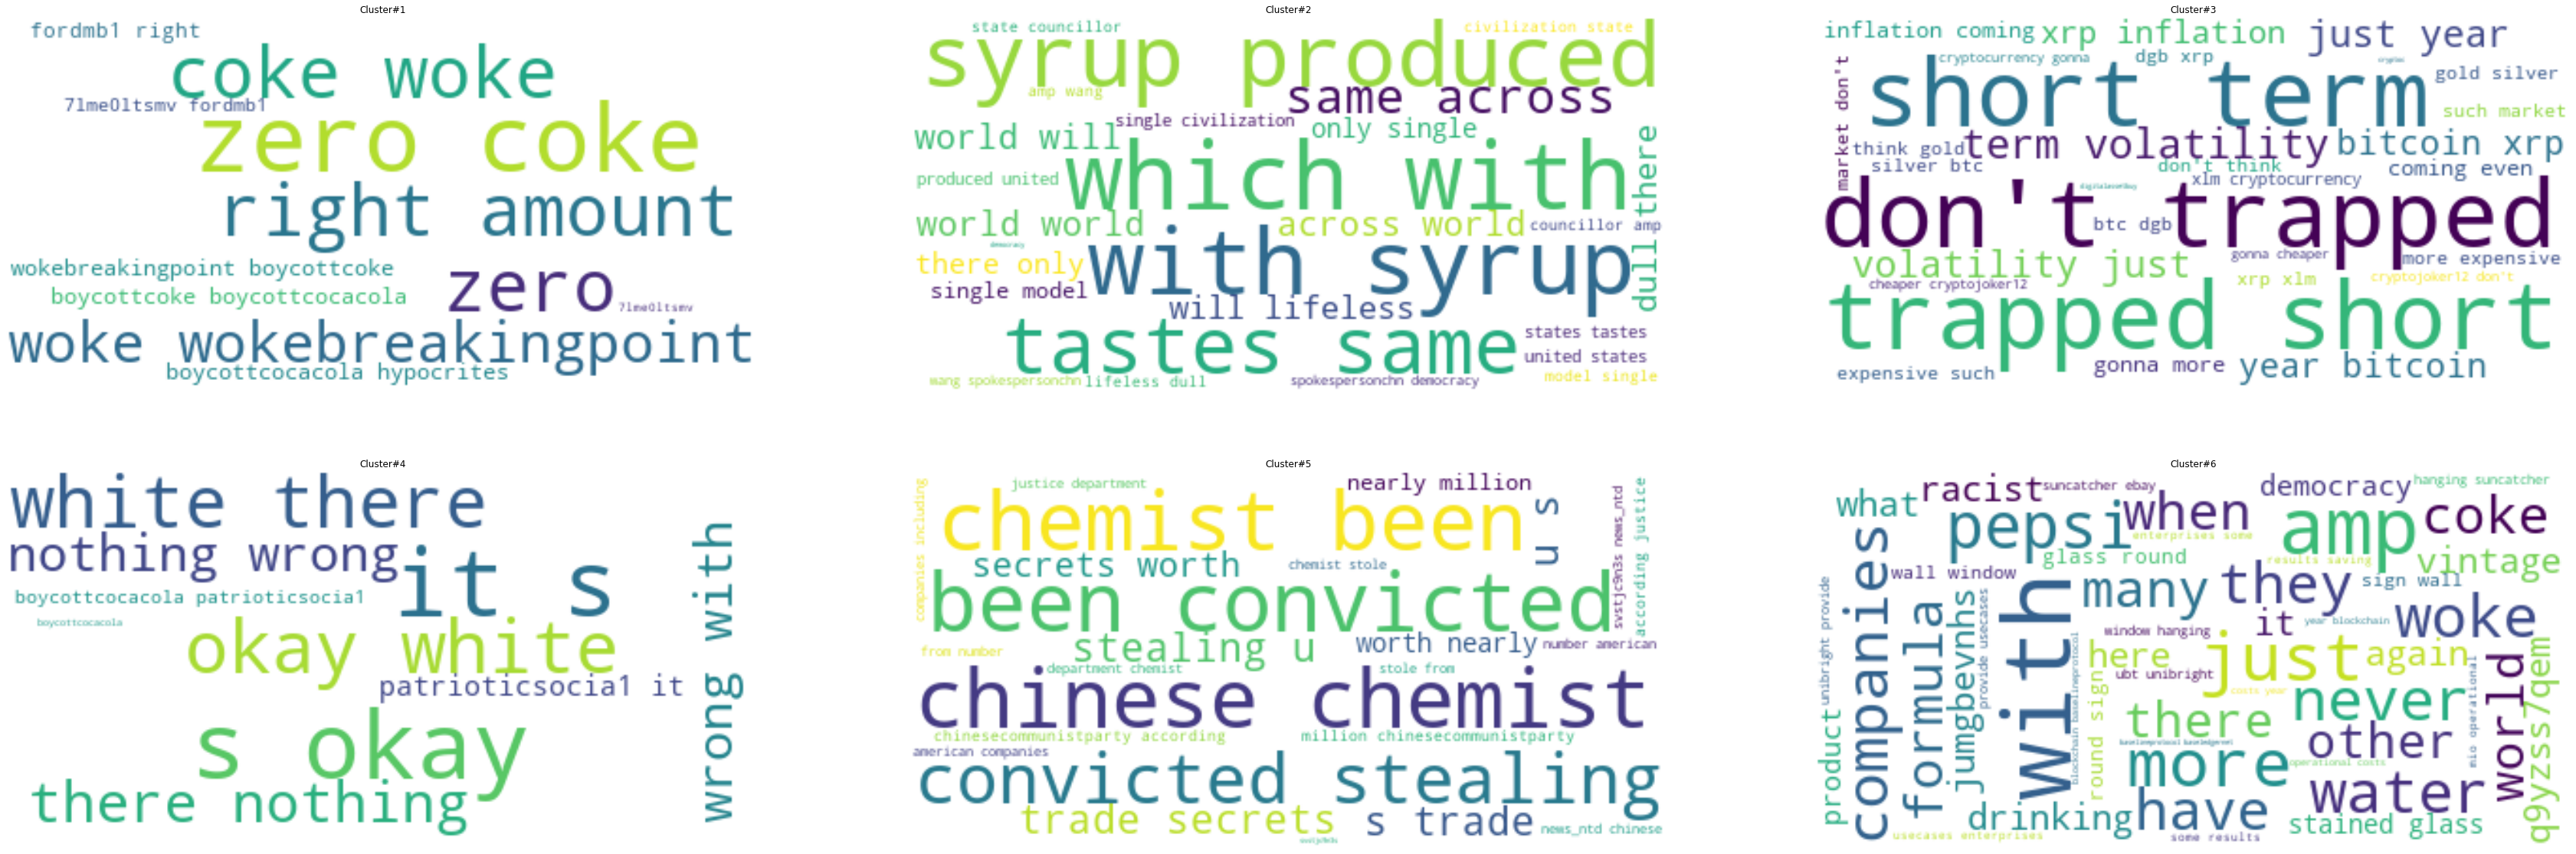

In [47]:
fix,ax=plt.subplots(nrows=2,ncols=3,figsize=(60,20))
result=pd.DataFrame({'Cluster':labels,'Tweets':tweetList})
for k in range(0,idealK):
    s=result[result.Cluster==k]
#   print("\n printing S",s)
    text=s['Tweets'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in re.split(r"[-;,\s]\s*",text) \
                  if word not in ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co'] and len(word) > 3 ])

    #print(text)
    #smallwords = [word for word in text.split() if len(word) < 4] 
    #print("smallwords", smallwords)
    exclude = ['delta','deltaairlines','#delta','@delta','@deltaairlines','https','t','co','that','cocacola','coca','cola']
    wordcloud = WordCloud(stopwords=exclude,max_font_size=50, max_words=50,background_color="white").generate(text)
    #print('Cluster: {}'.format(k))
    #print('Tweets')
    tweets=tweetClusters[tweetClusters.cluster==k]['tweet']         
    #print(tweets.to_string(index=False))
    plt.subplot(2,3,k+1).title.set_text("Cluster#{}".format(k+1))
    #plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.show()

## Part 2

c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0

c:\users\kk_kr\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128166 missing from current font.
  font.set_text(s, 0, flags=flags)


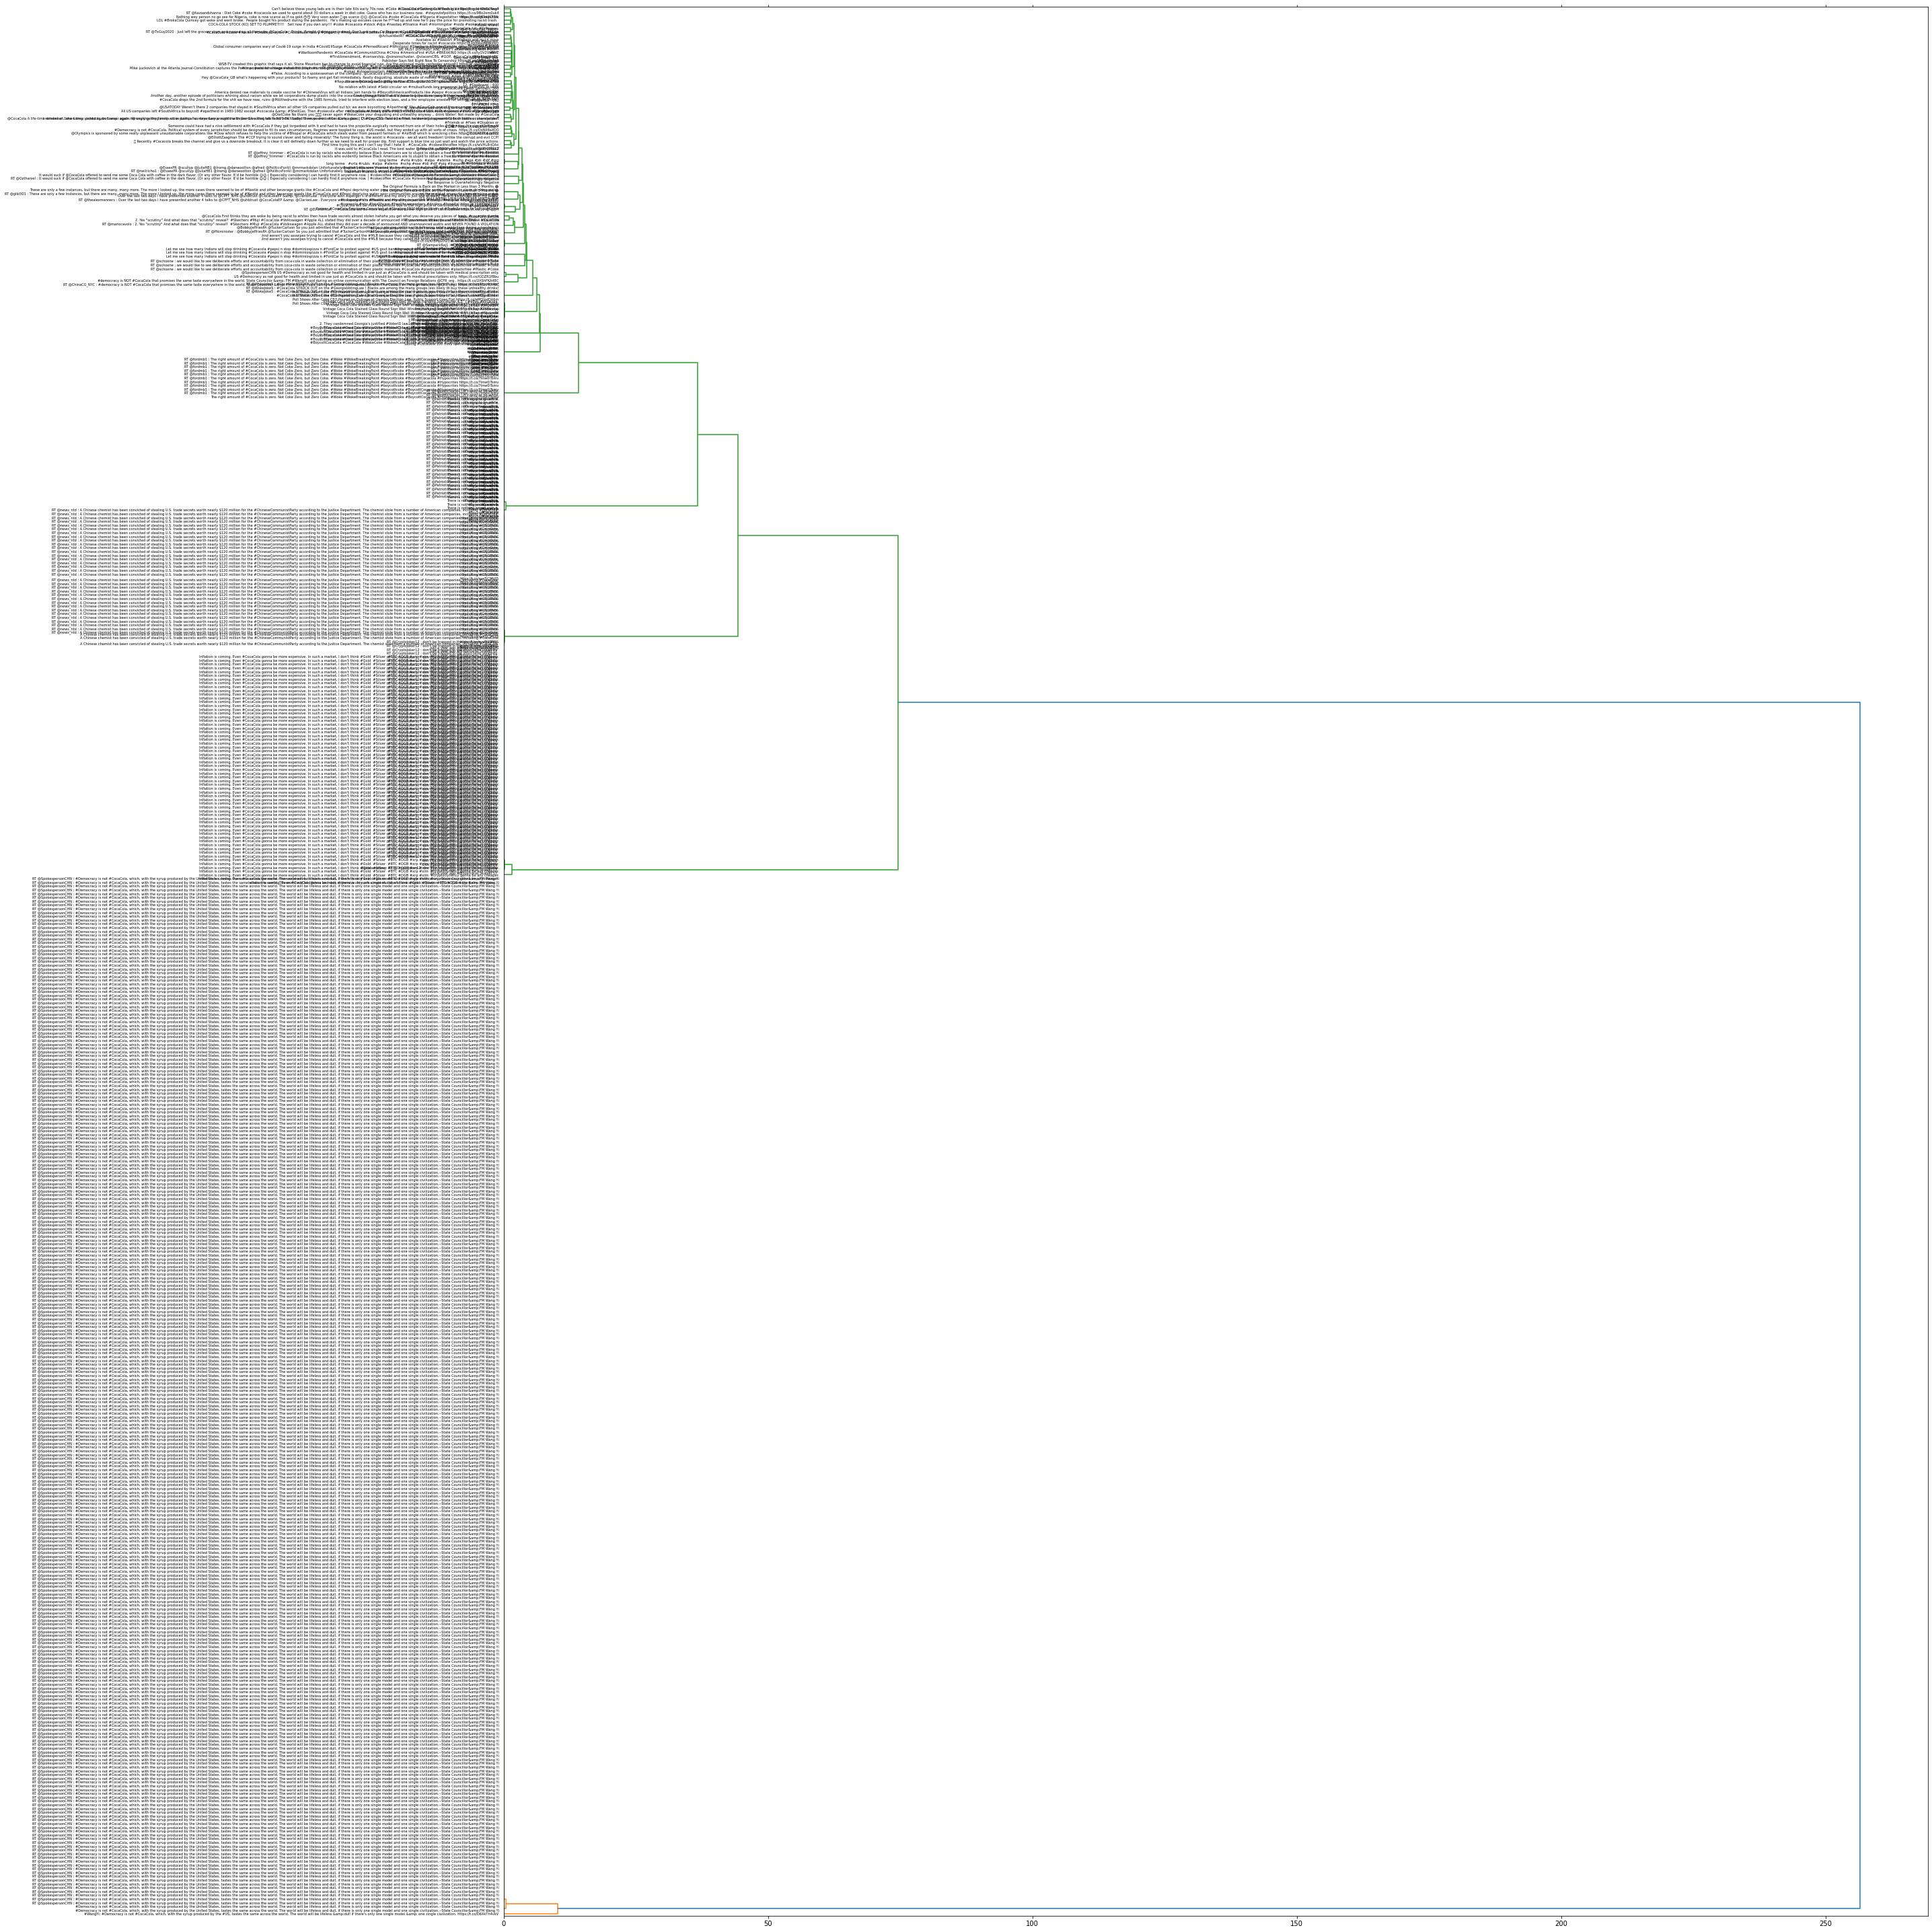

In [33]:
len(vectorizer.get_feature_names())

dist = 1 - cosine_similarity(X)
cosine_similarity(X)
dist


linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(40, 40)) # set size


ax = dendrogram(linkage_matrix, orientation="right", labels=tweetList);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [39]:
tweetClusters[tweetClusters.cluster==0]['tweet']

34    RT @fordmb1 : The right amount of #CocaCola is...
36    RT @fordmb1 : The right amount of #CocaCola is...
37    RT @fordmb1 : The right amount of #CocaCola is...
38    RT @fordmb1 : The right amount of #CocaCola is...
40    RT @fordmb1 : The right amount of #CocaCola is...
41    RT @fordmb1 : The right amount of #CocaCola is...
42    RT @fordmb1 : The right amount of #CocaCola is...
45    RT @fordmb1 : The right amount of #CocaCola is...
46    RT @fordmb1 : The right amount of #CocaCola is...
47    RT @fordmb1 : The right amount of #CocaCola is...
50    The right amount of #CocaCola is zero. Not Cok...
Name: tweet, dtype: object